# Лабораторная работа №1. Вычисление производных.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


Имеем функции, производные которых надо вычислить:

$f_1 = \sin(x^2), \quad  f_2 = \cos(\sin (x)), \quad  f_3 = \exp(\sin(\cos (x))), \quad f_4 = \ln(x+3), \quad f_5 = (x+3)^{(0.5)}$

Найдем их производные аналитически:

$f'_1 = 2 x \cos(x^2),\quad  f'_2 = - \cos (x) \sin(\sin (x)), \quad f'_3 = - \sin(x) \cos(\cos (x)) \exp(\sin(\cos (x)), $ 

$f'_4 = \frac{1}{x + 3}, \quad f'_5 = 0.5 (x + 3)^{(-0.5)}$

Определим в коде эти функции:

In [3]:
def func1 (x):
    return np.sin(x ** 2)

def func2 (x):
    return np.cos(np.sin(x))

def func3 (x):
    return np.exp(np.sin(np.cos(x)))

def func4 (x):
    return np.log(x + 3)

def func5 (x):
    return (x + 3) ** (0.5)

func_list = [func1, func2, func3, func4, func5] 

И их производные:

In [4]:
def dfunc1 (x):
    return 2 * x * np.cos(x ** 2)

def dfunc2 (x):
    return - np.cos(x) * np.sin(np.sin(x))

def dfunc3 (x):
    return - np.sin(x) * np.cos(np.cos(x)) * np.exp(np.sin(np.cos(x)))

def dfunc4 (x):
    return 1 / (x + 3)

def dfunc5 (x):
    return 0.5 * ((x + 3) ** (-0.5))

dfunc_list = [dfunc1, dfunc2, dfunc3, dfunc4, dfunc5] 

Для численного подсчета будем использовать следующие формулы:

$ 1) \frac{f(x + h) - f(x)}{h} $ \
\
$ 2) \frac{f(x) - f(x - h)}{h} $ \
\
$ 3) \frac{f(x + h) - f(x - h)}{2h} $ \
\
$ 4) \frac{4}{3} \frac{f(x + h) - f(x - h)}{2h}  - \frac{1}{3} \frac{f(x + 2h) - f(x - 2h)}{4h}$ \
\
$ 5) \frac{3}{2} \frac{f(x + h) - f(x - h)}{2h}  - \frac{3}{5} \frac{f(x + 2h) - f(x - 2h)}{4h} 
     + \frac{1}{10} \frac{f(x + 3h) - f(x - 3h)}{6h}$

Их реализация в программе:

In [5]:
def method1 (x, i, j):
    return (func_list[i](x + h[j]) - func_list[i](x)) / h[j]

def method2 (x, i, j):
    return (func_list[i](x) - func_list[i](x - h[j])) / h[j]

def method3 (x, i, j):
    return (func_list[i](x + h[j]) - func_list[i](x - h[j])) / (2 * h[j]) 

def method4 (x, i, j):
    return (4/3) * (func_list[i](x + h[j]) - func_list[i](x - h[j])) / (2 * h[j]) - (1/3) * (func_list[i](x + 2 * h[j]) - func_list[i](x - 2 * h[j])) / (4 * h[j])

def method5 (x, i, j):
    return (3/2) * (func_list[i](x + h[j]) - func_list[i](x - h[j])) / (2 * h[j]) - (3/5) * (func_list[i](x + 2 * h[j]) - func_list[i](x - 2 * h[j])) / (4 * h[j]) + (1/10) * (func_list[i](x + 3 * h[j]) - func_list[i](x - 3 * h[j])) / (6 * h[j])

method_list = [method1, method2, method3, method4, method5]

Задаем точку, в которой ищем производные (`x`), и находим вначале их по точным формулам:

In [6]:
x = 4.0
y_accur = np.zeros(5 , dtype = np.float64)
h       = np.zeros(22, dtype = np.float64)
h_log2  = np.zeros(22, dtype = np.float64)

for i in range(0, 22):
    h     [i] = 2 / (2 ** i)
    h_log2[i] = np.log2(2 / (2 ** i))

for i in range(0, 5):
    y_accur[i] = dfunc_list[i](x)


Имеем для $f_1 = \sin(x^2)$:

Method 1: k = 1.0104608602398828
Method 2: k = 0.9881502001771029
Method 3: k = 1.9914442032589585
Method 4: k = 3.982367927037876
Method 5: k = 5.891875166579267


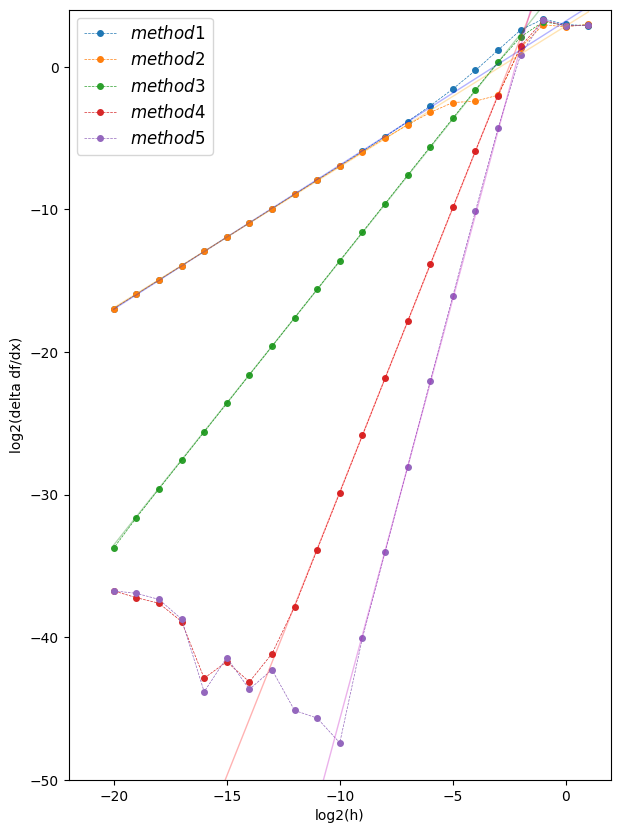

In [7]:
dfunc1_met1 = np.zeros(22, dtype = np.float64)
dfunc1_met2 = np.zeros(22, dtype = np.float64)
dfunc1_met3 = np.zeros(22, dtype = np.float64)
dfunc1_met4 = np.zeros(22, dtype = np.float64)
dfunc1_met5 = np.zeros(22, dtype = np.float64)

for i in range(0, 22):
    dfunc1_met1[i] = np.log2(np.fabs(y_accur[0] - method1(x, 0, i)))
    dfunc1_met2[i] = np.log2(np.fabs(y_accur[0] - method2(x, 0, i)))
    dfunc1_met3[i] = np.log2(np.fabs(y_accur[0] - method3(x, 0, i)))
    dfunc1_met4[i] = np.log2(np.fabs(y_accur[0] - method4(x, 0, i)))
    dfunc1_met5[i] = np.log2(np.fabs(y_accur[0] - method5(x, 0, i)))

axis_x = h_log2

fig = plt.figure(figsize=(7, 10))
plot1 = fig.add_subplot()

plot1.plot(axis_x, dfunc1_met1, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 1$')
plot1.plot(axis_x, dfunc1_met2, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 2$')
plot1.plot(axis_x, dfunc1_met3, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 3$')
plot1.plot(axis_x, dfunc1_met4, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 4$')
plot1.plot(axis_x, dfunc1_met5, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 5$')

plot1.set(xlim=(-22, 2), ylim=(-50, 4))
plot1.set_xlabel('log2(h)')
plot1.set_ylabel('log2(delta df/dx)')

p1, v1 = np.polyfit(axis_x[7:21], dfunc1_met1[7:21], deg=1, cov=True)
pf1 = np.poly1d(p1)
plot1.plot(axis_x, pf1(axis_x), ls = '-', lw = 1, c = 'blue', alpha = 0.3 )
print("Method 1: k =", p1[0])

p2, v2 = np.polyfit(axis_x[7:21], dfunc1_met2[7:21], deg=1, cov=True)
pf2 = np.poly1d(p2)
plot1.plot(axis_x, pf2(axis_x), ls = '-', lw = 1, c = 'orange', alpha = 0.3 )
print("Method 2: k =", p2[0])

p3, v3 = np.polyfit(axis_x[3:19], dfunc1_met3[3:19], deg=1, cov=True)
pf3 = np.poly1d(p3)
plot1.plot(axis_x, pf3(axis_x), ls = '-', lw = 1, c = 'green', alpha = 0.3 )
print("Method 3: k =", p3[0])

p4, v4 = np.polyfit(axis_x[4:12], dfunc1_met4[4:12], deg=1, cov=True)
pf4 = np.poly1d(p4)
plot1.plot(axis_x, pf4(axis_x), ls = '-', lw = 1, c = 'red', alpha = 0.3 )
print("Method 4: k =", p4[0])

p5, v5 = np.polyfit(axis_x[3:11], dfunc1_met5[3:11], deg=1, cov=True)
pf5 = np.poly1d(p5)
plot1.plot(axis_x, pf5(axis_x), ls = '-', lw = 1, c = 'm', alpha = 0.3 )
print("Method 5: k =", p5[0])



plot1.legend(loc='best', fontsize=12)
plt.show()


Здесь `k` - наклон линии аппроксимации, которой есть ни что иное, как показатель степени `h` в формуле для рассчета ошибки: $ |f'_{real} - f'_{comp}| \propto h^k $.

Для $  f_2 = \cos(\sin (x))$ имеем:

Method 1: k = 1.0148733860345318
Method 2: k = 0.9798271282830764
Method 3: k = 1.9938940085614398
Method 4: k = 3.999761354726035
Method 5: k = 5.615969080154909


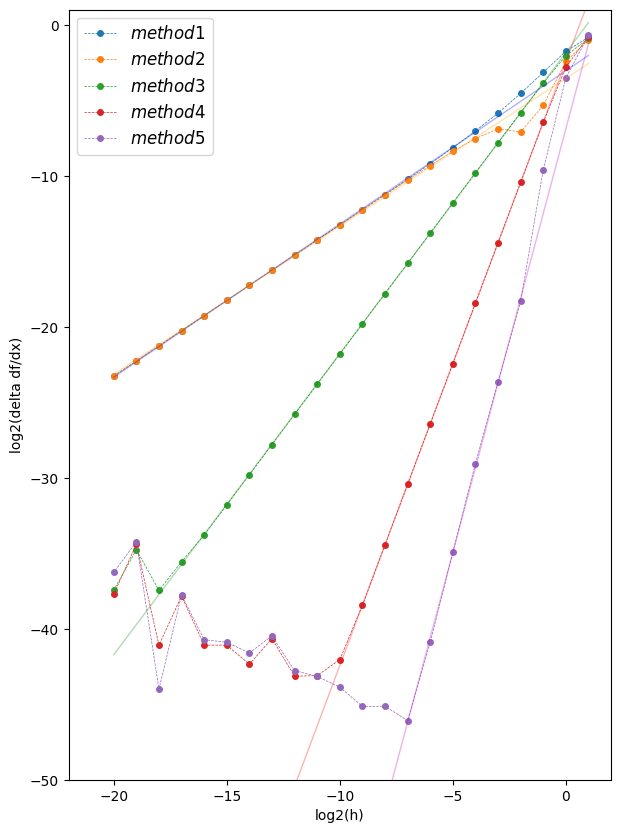

In [8]:
dfunc2_met1 = np.zeros(22, dtype = np.float64)
dfunc2_met2 = np.zeros(22, dtype = np.float64)
dfunc2_met3 = np.zeros(22, dtype = np.float64)
dfunc2_met4 = np.zeros(22, dtype = np.float64)
dfunc2_met5 = np.zeros(22, dtype = np.float64)

for i in range(0, 22):
    dfunc2_met1[i] = np.log2(np.fabs(y_accur[1] - method1(x, 1, i)))
    dfunc2_met2[i] = np.log2(np.fabs(y_accur[1] - method2(x, 1, i)))
    dfunc2_met3[i] = np.log2(np.fabs(y_accur[1] - method3(x, 1, i)))
    dfunc2_met4[i] = np.log2(np.fabs(y_accur[1] - method4(x, 1, i)))
    dfunc2_met5[i] = np.log2(np.fabs(y_accur[1] - method5(x, 1, i)))

axis_x = h_log2

fig = plt.figure(figsize=(7, 10))
plot2 = fig.add_subplot()

plot2.plot(axis_x, dfunc2_met1, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 1$')
plot2.plot(axis_x, dfunc2_met2, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 2$')
plot2.plot(axis_x, dfunc2_met3, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 3$')
plot2.plot(axis_x, dfunc2_met4, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 4$')
plot2.plot(axis_x, dfunc2_met5, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 5$')

plot2.set(xlim=(-22, 2), ylim=(-50, 1))
plot2.set_xlabel('log2(h)')
plot2.set_ylabel('log2(delta df/dx)')

p1, v1 = np.polyfit(axis_x[4:21], dfunc2_met1[4:21], deg=1, cov=True)
pf1 = np.poly1d(p1)
plot2.plot(axis_x, pf1(axis_x), ls = '-', lw = 1, c = 'blue', alpha = 0.3 )
print("Method 1: k =", p1[0])

p2, v2 = np.polyfit(axis_x[4:21], dfunc2_met2[4:21], deg=1, cov=True)
pf2 = np.poly1d(p2)
plot2.plot(axis_x, pf2(axis_x), ls = '-', lw = 1, c = 'orange', alpha = 0.3 )
print("Method 2: k =", p2[0])

p3, v3 = np.polyfit(axis_x[3:19], dfunc2_met3[3:19], deg=1, cov=True)
pf3 = np.poly1d(p3)
plot2.plot(axis_x, pf3(axis_x), ls = '-', lw = 1, c = 'green', alpha = 0.3 )
print("Method 3: k =", p3[0])

p4, v4 = np.polyfit(axis_x[2:11], dfunc2_met4[2:11], deg=1, cov=True)
pf4 = np.poly1d(p4)
plot2.plot(axis_x, pf4(axis_x), ls = '-', lw = 1, c = 'red', alpha = 0.3 )
print("Method 4: k =", p4[0])

p5, v5 = np.polyfit(axis_x[3:9], dfunc2_met5[3:9], deg=1, cov=True)
pf5 = np.poly1d(p5)
plot2.plot(axis_x, pf5(axis_x), ls = '-', lw = 1, c = 'm', alpha = 0.3 )
print("Method 5: k =", p5[0])



plot2.legend(loc='best', fontsize=12)
plt.show()

Получаем для $f_3 = \exp(\sin(\cos (x)))$:

Method 1: k = 1.0028891804469884
Method 2: k = 0.9970646188258218
Method 3: k = 1.9975931095227153
Method 4: k = 4.035350785551557
Method 5: k = 5.96168059621623


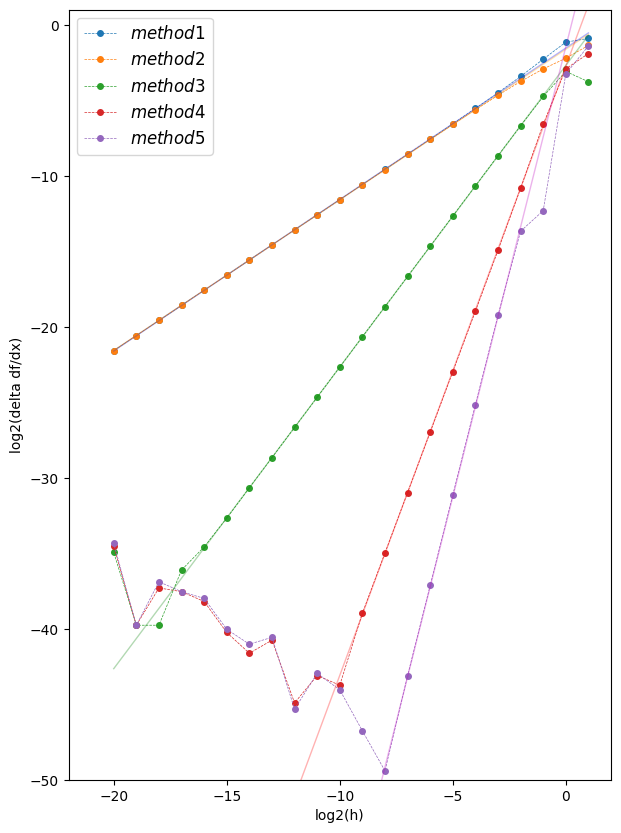

In [9]:
dfunc3_met1 = np.zeros(22, dtype = np.float64)
dfunc3_met2 = np.zeros(22, dtype = np.float64)
dfunc3_met3 = np.zeros(22, dtype = np.float64)
dfunc3_met4 = np.zeros(22, dtype = np.float64)
dfunc3_met5 = np.zeros(22, dtype = np.float64)

for i in range(0, 22):
    dfunc3_met1[i] = np.log2(np.fabs(y_accur[2] - method1(x, 2, i)))
    dfunc3_met2[i] = np.log2(np.fabs(y_accur[2] - method2(x, 2, i)))
    dfunc3_met3[i] = np.log2(np.fabs(y_accur[2] - method3(x, 2, i)))
    dfunc3_met4[i] = np.log2(np.fabs(y_accur[2] - method4(x, 2, i)))
    dfunc3_met5[i] = np.log2(np.fabs(y_accur[2] - method5(x, 2, i)))

axis_x = h_log2

fig = plt.figure(figsize=(7, 10))
plot3 = fig.add_subplot()

plot3.plot(axis_x, dfunc3_met1, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 1$')
plot3.plot(axis_x, dfunc3_met2, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 2$')
plot3.plot(axis_x, dfunc3_met3, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 3$')
plot3.plot(axis_x, dfunc3_met4, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 4$')
plot3.plot(axis_x, dfunc3_met5, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 5$')

plot3.set(xlim=(-22, 2), ylim=(-50, 1))
plot3.set_xlabel('log2(h)')
plot3.set_ylabel('log2(delta df/dx)')

p1, v1 = np.polyfit(axis_x[4:21], dfunc3_met1[4:21], deg=1, cov=True)
pf1 = np.poly1d(p1)
plot3.plot(axis_x, pf1(axis_x), ls = '-', lw = 1, c = 'blue', alpha = 0.3 )
print("Method 1: k =", p1[0])

p2, v2 = np.polyfit(axis_x[4:21], dfunc3_met2[4:21], deg=1, cov=True)
pf2 = np.poly1d(p2)
plot3.plot(axis_x, pf2(axis_x), ls = '-', lw = 1, c = 'orange', alpha = 0.3 )
print("Method 2: k =", p2[0])

p3, v3 = np.polyfit(axis_x[2:17], dfunc3_met3[2:17], deg=1, cov=True)
pf3 = np.poly1d(p3)
plot3.plot(axis_x, pf3(axis_x), ls = '-', lw = 1, c = 'green', alpha = 0.3 )
print("Method 3: k =", p3[0])

p4, v4 = np.polyfit(axis_x[2:11], dfunc3_met4[2:11], deg=1, cov=True)
pf4 = np.poly1d(p4)
plot3.plot(axis_x, pf4(axis_x), ls = '-', lw = 1, c = 'red', alpha = 0.3 )
print("Method 4: k =", p4[0])

p5, v5 = np.polyfit(axis_x[3:10], dfunc3_met5[3:10], deg=1, cov=True)
pf5 = np.poly1d(p5)
plot3.plot(axis_x, pf5(axis_x), ls = '-', lw = 1, c = 'm', alpha = 0.3 )
print("Method 5: k =", p5[0])



plot3.legend(loc='best', fontsize=12)
plt.show()

Вычисляем для $f_4 = \ln(x+3)$:

Method 1: k = 0.9994414670240427
Method 2: k = 1.0006527551052464
Method 3: k = 2.002620596845278
Method 4: k = 4.0301320197935775
Method 5: k = 6.078050350764939


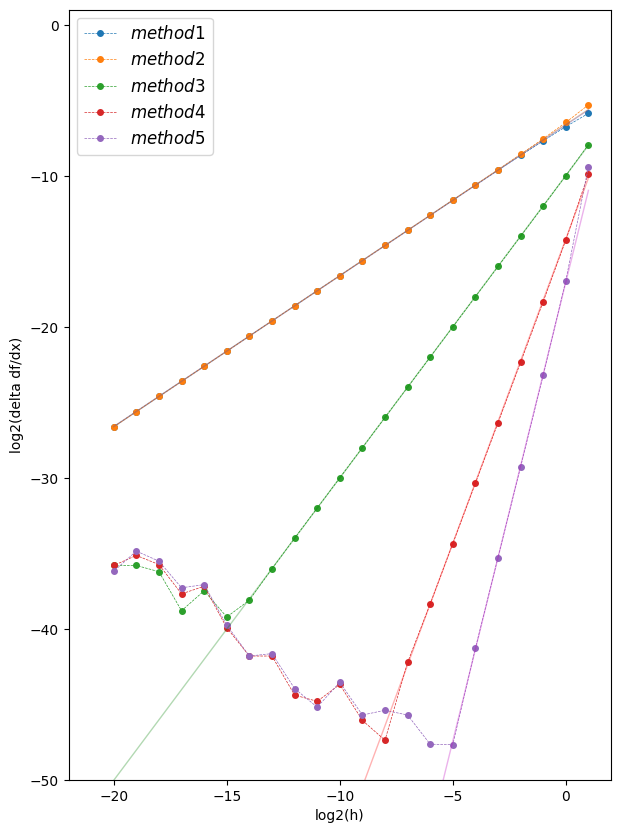

In [10]:
dfunc4_met1 = np.zeros(22, dtype = np.float64)
dfunc4_met2 = np.zeros(22, dtype = np.float64)
dfunc4_met3 = np.zeros(22, dtype = np.float64)
dfunc4_met4 = np.zeros(22, dtype = np.float64)
dfunc4_met5 = np.zeros(22, dtype = np.float64)

for i in range(0, 22):
    dfunc4_met1[i] = np.log2(np.fabs(y_accur[3] - method1(x, 3, i)))
    dfunc4_met2[i] = np.log2(np.fabs(y_accur[3] - method2(x, 3, i)))
    dfunc4_met3[i] = np.log2(np.fabs(y_accur[3] - method3(x, 3, i)))
    dfunc4_met4[i] = np.log2(np.fabs(y_accur[3] - method4(x, 3, i)))
    dfunc4_met5[i] = np.log2(np.fabs(y_accur[3] - method5(x, 3, i)))

axis_x = h_log2

fig = plt.figure(figsize=(7, 10))
plot4 = fig.add_subplot()

plot4.plot(axis_x, dfunc4_met1, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 1$')
plot4.plot(axis_x, dfunc4_met2, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 2$')
plot4.plot(axis_x, dfunc4_met3, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 3$')
plot4.plot(axis_x, dfunc4_met4, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 4$')
plot4.plot(axis_x, dfunc4_met5, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 5$')

plot4.set(xlim=(-22, 2), ylim=(-50, 1))
plot4.set_xlabel('log2(h)')
plot4.set_ylabel('log2(delta df/dx)')

p1, v1 = np.polyfit(axis_x[4:21], dfunc4_met1[4:21], deg=1, cov=True)
pf1 = np.poly1d(p1)
plot4.plot(axis_x, pf1(axis_x), ls = '-', lw = 1, c = 'blue', alpha = 0.3 )
print("Method 1: k =", p1[0])

p2, v2 = np.polyfit(axis_x[4:21], dfunc4_met2[4:21], deg=1, cov=True)
pf2 = np.poly1d(p2)
plot4.plot(axis_x, pf2(axis_x), ls = '-', lw = 1, c = 'orange', alpha = 0.3 )
print("Method 2: k =", p2[0])

p3, v3 = np.polyfit(axis_x[0:14], dfunc4_met3[0:14], deg=1, cov=True)
pf3 = np.poly1d(p3)
plot4.plot(axis_x, pf3(axis_x), ls = '-', lw = 1, c = 'green', alpha = 0.3 )
print("Method 3: k =", p3[0])

p4, v4 = np.polyfit(axis_x[0:9], dfunc4_met4[0:9], deg=1, cov=True)
pf4 = np.poly1d(p4)
plot4.plot(axis_x, pf4(axis_x), ls = '-', lw = 1, c = 'red', alpha = 0.3 )
print("Method 4: k =", p4[0])

p5, v5 = np.polyfit(axis_x[1:6], dfunc4_met5[1:6], deg=1, cov=True)
pf5 = np.poly1d(p5)
plot4.plot(axis_x, pf5(axis_x), ls = '-', lw = 1, c = 'm', alpha = 0.3 )
print("Method 5: k =", p5[0])



plot4.legend(loc='best', fontsize=12)
plt.show()

Наконец для $f_5 = (x+3)^{(0.5)}$:

Method 1: k = 0.9994831604285844
Method 2: k = 1.0002157909595752
Method 3: k = 2.0012511138133786
Method 4: k = 4.022923444416825
Method 5: k = 6.057760162594467


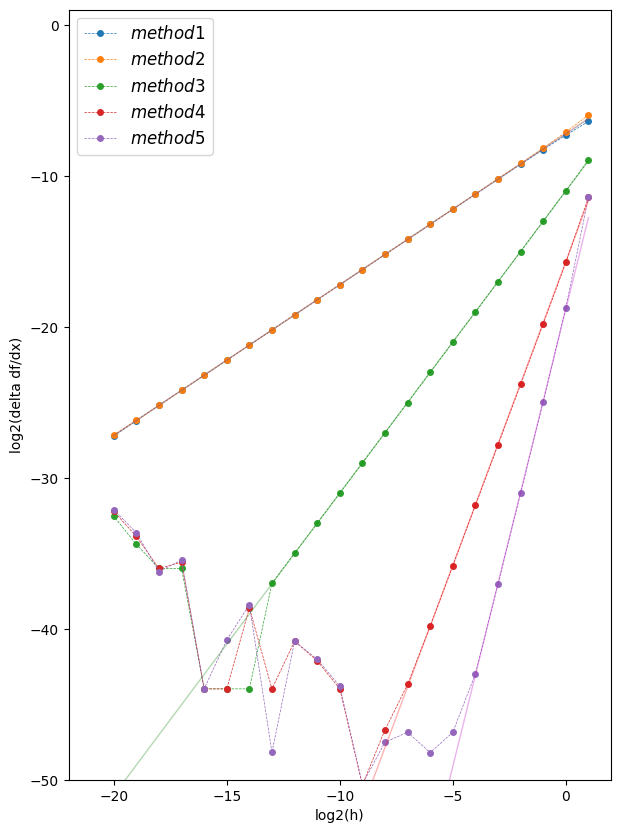

In [11]:
dfunc5_met1 = np.zeros(22, dtype = np.float64)
dfunc5_met2 = np.zeros(22, dtype = np.float64)
dfunc5_met3 = np.zeros(22, dtype = np.float64)
dfunc5_met4 = np.zeros(22, dtype = np.float64)
dfunc5_met5 = np.zeros(22, dtype = np.float64)

for i in range(0, 22):
    dfunc5_met1[i] = np.log2(np.fabs(y_accur[4] - method1(x, 4, i)))
    dfunc5_met2[i] = np.log2(np.fabs(y_accur[4] - method2(x, 4, i)))
    dfunc5_met3[i] = np.log2(np.fabs(y_accur[4] - method3(x, 4, i)))
    dfunc5_met4[i] = np.log2(np.fabs(y_accur[4] - method4(x, 4, i)))
    dfunc5_met5[i] = np.log2(np.fabs(y_accur[4] - method5(x, 4, i)))

axis_x = h_log2

fig = plt.figure(figsize=(7, 10))
plot5 = fig.add_subplot()

plot5.plot(axis_x, dfunc5_met1, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 1$')
plot5.plot(axis_x, dfunc5_met2, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 2$')
plot5.plot(axis_x, dfunc5_met3, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 3$')
plot5.plot(axis_x, dfunc5_met4, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 4$')
plot5.plot(axis_x, dfunc5_met5, 'o', ms = 4, ls = '--', lw = 0.5, label = r'$method 5$')

plot5.set(xlim=(-22, 2), ylim=(-50, 1))
plot5.set_xlabel('log2(h)')
plot5.set_ylabel('log2(delta df/dx)')

p1, v1 = np.polyfit(axis_x[4:21], dfunc5_met1[4:21], deg=1, cov=True)
pf1 = np.poly1d(p1)
plot5.plot(axis_x, pf1(axis_x), ls = '-', lw = 1, c = 'blue', alpha = 0.3 )
print("Method 1: k =", p1[0])

p2, v2 = np.polyfit(axis_x[4:21], dfunc5_met2[4:21], deg=1, cov=True)
pf2 = np.poly1d(p2)
plot5.plot(axis_x, pf2(axis_x), ls = '-', lw = 1, c = 'orange', alpha = 0.3 )
print("Method 2: k =", p2[0])

p3, v3 = np.polyfit(axis_x[0:14], dfunc5_met3[0:14], deg=1, cov=True)
pf3 = np.poly1d(p3)
plot5.plot(axis_x, pf3(axis_x), ls = '-', lw = 1, c = 'green', alpha = 0.3 )
print("Method 3: k =", p3[0])

p4, v4 = np.polyfit(axis_x[0:9], dfunc5_met4[0:9], deg=1, cov=True)
pf4 = np.poly1d(p4)
plot5.plot(axis_x, pf4(axis_x), ls = '-', lw = 1, c = 'red', alpha = 0.3 )
print("Method 4: k =", p4[0])

p5, v5 = np.polyfit(axis_x[1:6], dfunc5_met5[1:6], deg=1, cov=True)
pf5 = np.poly1d(p5)
plot5.plot(axis_x, pf5(axis_x), ls = '-', lw = 1, c = 'm', alpha = 0.3 )
print("Method 5: k =", p5[0])



plot5.legend(loc='best', fontsize=12)
plt.show()

Вывод: После вычисления производных приведенными методами и построения графиков зависимостей абсолютной погрешности от шага мы убедились в справедливости выражения: $ |f'_{real} - f'_{comp}| \propto h^k $. Также по графикам можем определить оптимальный шаг, после которого зависимоть теряет свою линейность в двойном логарифмическом масштабе.